### Actividad 4: Comprensión de los datos
Librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip install matplotlib seaborn

In [3]:
import matplotlib.pyplot as plt

### Leer la base de datos

In [4]:
data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### ¿Qué variables presentan datos atípicos?
Crear el boxplot utilizando Seaborn

In [5]:
var = data[['LotFrontage']]

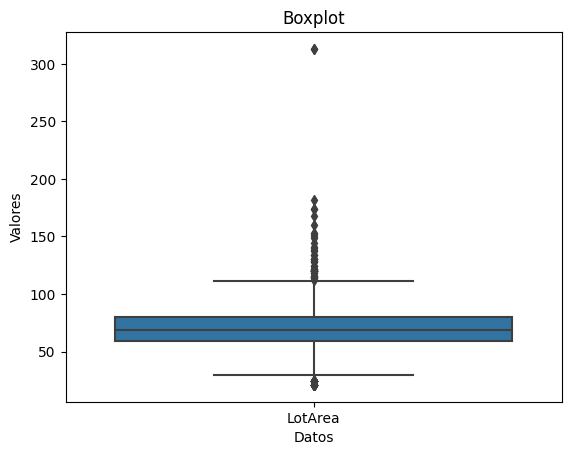

In [6]:
sns.boxplot(data=var)

plt.xticks([0], ['LotArea'])

plt.xlabel('Datos')
plt.ylabel('Valores')
plt.title('Boxplot')

plt.show()



In [24]:
# Código Alex
from scipy.stats import norm

S_Price = data[['SalePrice']]
print(type(S_Price))

# Crear una matriz de subgráficos con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Agregar un boxplot a cada subgráfico utilizando la función boxplot de scipy
# La función boxplot de scipy no tiene todos los parámetros de personalización que tiene matplotlib
# Por lo tanto, utilizaremos matplotlib solo para personalización adicional
for ax, data, title in zip(axes, [S_Price], ['Sale_Price']):
    ax.boxplot(data)
    ax.set_title(title)

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

TypeError: list indices must be integers or slices, not list

### ¿En qué variables identifica un tipo de sesgo?
Creación del histograma

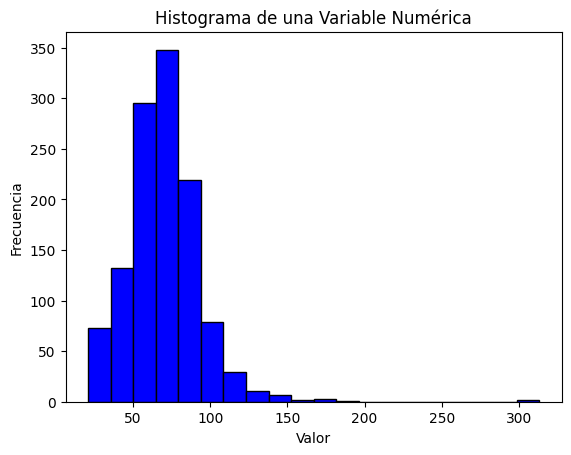

In [9]:
# Crear el histograma
plt.hist(var, bins=20, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de una Variable Numérica')

# Mostrar el histograma
plt.show()

## ¿Sigue una distribución normal cada variable numérica?
### Prueba de Anderson Darling

In [10]:
# num = data.loc[:, data.columns!='MSSubClass']
# numeric = num.select_dtypes(np.number)

In [11]:
var = var.values.tolist()

In [12]:
from scipy.stats import anderson

result = anderson(var, dist='norm')

print("Estadístico A^2:", result.statistic)
print("Valores críticos:", result.critical_values)
print("Niveles de significancia:", result.significance_level)

# Comprobar si rechazamos la hipótesis nula basada en el estadístico A^2 y los valores críticos
alpha = 0.05  # Nivel de significancia
if result.statistic.any() > result.critical_values[2]:  # Utilizamos el valor crítico para alfa = 0.05
    print("Rechazar la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución normal.")


Estadístico A^2: [nan nan nan ... nan nan nan]
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Rechazar la hipótesis nula: Los datos no siguen una distribución normal.
